# Solusi UTS Komputasi Sains

1.

In [ ]:
import numpy as np

In [ ]:
A = np.array([[1, 0, -1],
              [-0.5, 1, -0.25],
              [1, -0.5, 1]])

In [ ]:
def diagonal(A):
  n = A.shape[0]
  D = np.zeros_like(A)
  for i in range(n):
    D[i,i] = A[i,i]
  return D

def lower(A):
  n = A.shape[0]
  L = np.zeros_like(A)
  for i in range(n):
    for j in range(n):
      if i > j:
        L[i,j] = -A[i,j]
  return L

def upper(A):
  n = A.shape[0]
  U = np.zeros_like(A)
  for i in range(n):
    for j in range(n):
      if i < j:
        U[i,j] = -A[i,j]
  return U

In [ ]:
def spectral_radius(T):
  eigval = np.linalg.eigvals(T)
  rho = np.max(np.abs(eigval))
  return rho

In [ ]:
D = diagonal(A)
L = lower(A)
U = upper(A)
print("{} \n\n {} \n\n {}".format(D, L, U))


[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]] 

 [[ 0.   0.   0. ]
 [ 0.5  0.   0. ]
 [-1.   0.5  0. ]] 

 [[ 0.   -0.    1.  ]
 [ 0.    0.    0.25]
 [ 0.    0.    0.  ]]


In [ ]:
Tj = np.matmul(D, (L+U))
Tj

array([[ 0.  ,  0.  ,  1.  ],
       [ 0.5 ,  0.  ,  0.25],
       [-1.  ,  0.5 ,  0.  ]])

In [ ]:
spectral_radius(Tj)

0.9721052103388309

In [ ]:
X = np.linalg.inv(D - L)
Tgs = np.matmul(X, U)
Tgs

array([[ 0.   ,  0.   ,  1.   ],
       [ 0.   ,  0.   ,  0.75 ],
       [ 0.   ,  0.   , -0.625]])

In [ ]:
spectral_radius(Tgs)

0.625

3.

In [ ]:
from scipy.linalg import norm

In [ ]:
def jacobi1(A, b, x0, epsilon=1e-5, N=1000):
  x = np.zeros(len(b))
  T = A - np.diag(np.diagonal(A))

  for k in range(N):
    x = (b - np.dot(T,x0))/np.diagonal(A)

    if norm(np.dot(A,x) - b) < epsilon:
      break
      
    x0 = x

  return k,x

In [ ]:
def gauss_seidel(A, b, x0, epsilon=1e-5, N=1000):
  x = np.zeros_like(b, dtype=np.double)
  
  for k in range(N):

    for i in range(len(b)):
      U = np.dot(A[i,:i], x[:i])
      V = np.dot(A[i,(i+1):], x0[(i+1):])
      x[i] = 1/A[i,i] * (b[i] - U - V)
      #print(k,x)
      
    if norm(np.dot(A,x) - b) < epsilon:
      break
    
    x0 = x

  return k,x

a.

In [ ]:
A = np.array([[2, -1, 1],
              [2, 2, 2],
              [-1, -1, 2]], dtype = np.double)
b = np.array([-1, 4, -5], dtype = np.double)

In [ ]:
HasilGS = gauss_seidel(A, b, x0=np.zeros(A.shape[0]))
HasilGS

(22, array([ 1.00000226,  1.9999975 , -1.00000012]))

In [ ]:
HasilJ = jacobi1(A, b, x0=np.zeros(A.shape[0]))
HasilJ

(999, array([-1.71063658e+48, -6.84254632e+48,  1.71063658e+48]))

Kenapa?

In [ ]:
D = diagonal(A)
L = lower(A)
U = upper(A)

print("{} \n\n {} \n\n {}".format(D, L, U))

[[2. 0. 0.]
 [0. 2. 0.]
 [0. 0. 2.]] 

 [[ 0.  0.  0.]
 [-2.  0.  0.]
 [ 1.  1.  0.]] 

 [[ 0.  1. -1.]
 [ 0.  0. -2.]
 [ 0.  0.  0.]]


* Untuk Jacobi

$T_J = D^{-1}(L + U)$

In [ ]:
D_invers = np.linalg.inv(D)
Tj = np.matmul(D, (L + U))
Tj

array([[ 0.,  2., -2.],
       [-4.,  0., -4.],
       [ 2.,  2.,  0.]])

In [ ]:
spectral_radius(Tj)

4.47213595499958

Karena $\rho (T_J) > 1$ maka menghasilkan barisan solusi yang __divergen__.

* Untuk Gauss-Seidel

$T_{GS} = (D - L)^{-1} U$

In [ ]:
DL_invers = np.linalg.inv((D-L))
Tgs = np.matmul(DL_invers, U)
Tgs

array([[ 0. ,  0.5, -0.5],
       [ 0. , -0.5, -0.5],
       [ 0. ,  0. , -0.5]])

In [ ]:
spectral_radius(Tgs)

0.5

Karena $\rho (T_{GS}) < 1$ maka menghasilkan barisan solusi yang __konvergen__.

b.

In [ ]:
A = np.array([[1, 2, -2],
              [1, 1, 1],
              [2, 2, 1]], dtype=np.double)
b = np.array([7, 2, 5], dtype=np.double)

In [ ]:
HasilGS = gauss_seidel(A, b, x0=np.zeros(A.shape[0]))
HasilGS

(999, array([ 1.60887017e+304, -1.60940593e+304,  1.07150861e+301]))

In [ ]:
HasilJ = jacobi1(A, b, x0=np.zeros(A.shape[0]))
HasilJ

(2, array([ 1.,  2., -1.]))

Kenapa?

In [ ]:
D = diagonal(A)
L = lower(A)
U = upper(A)

print("{} \n\n {} \n\n {}".format(D, L, U))

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]] 

 [[ 0.  0.  0.]
 [-1.  0.  0.]
 [-2. -2.  0.]] 

 [[ 0. -2.  2.]
 [ 0.  0. -1.]
 [ 0.  0.  0.]]


* Untuk Jacobi

In [ ]:
D_invers = np.linalg.inv(D)
Tj = np.matmul(D, (L + U))
Tj

array([[ 0., -2.,  2.],
       [-1.,  0., -1.],
       [-2., -2.,  0.]])

In [ ]:
spectral_radius(Tj)

1.2332218361015282e-05

Karena $\rho (T_J) < 1$ maka menghasilkan barisan solusi yang __konvergen__.

* Untuk Gauss-Seidel

In [ ]:
DL_invers = np.linalg.inv((D-L))
Tgs = np.matmul(DL_invers, U)
Tgs

array([[ 0., -2.,  2.],
       [ 0.,  2., -3.],
       [ 0.,  0.,  2.]])

In [ ]:
spectral_radius(Tgs)

2.0

Karena $\rho (T_{GS}) > 1$ maka menghasilkan barisan solusi yang __divergen__.

4.

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def cubic_spline(data):
  n = len(data) - 1

  data = np.array(data)

  # Nilai dari koef. a diketahui dari titik data atau input yaitu a_j = f(x_j)
  a = [data[i, 1] for i in range(n+1)]
  a = np.array(a)

  h = [(data[i+1,0] - data[i,0]) for i in range(n)]
  
  # Membentuk matriks A
  A = np.zeros((n+1,n+1))
  for i in range(1, n):
    for j in range(0, n):
      if j < i:
        for k in range(j):
          A[i,k] = 0
        A[i,j] = h[j-1]
      elif j > i:
        for k in range(j):
          A[k,j] = 0
        A[i,j] = h[j]
        A[i+1, j+1] = h[j]
      else:
        A[i,i] = 2*(h[j-1] + h[j])
  A[0, 0] = 1
  A[n, n] = 1
  A[:n-1, n] = 0

  # Membentuk vektor b
  b = np.zeros(n+1)
  for i in range(1,n):
    b[i] = (3/h[i]) * (a[i+1] - a[i]) - (3/h[i-1]) * (a[i] - a[i-1])

  # Cari nilai koef. c dengan Gauss-Seidel
  x0 = np.zeros(n+1)
  iter, c = gauss_seidel(A, b, x0)

  # Mencari koef. b dan d setelah koef. c didapatkan
  d = np.zeros(n+1)
  for i in range(n):
    b[i] = (a[i+1] - a[i])/h[i] - h[i]*(c[i+1] + 2*c[i])/3
    d[i] = (c[i+1] - c[i])/3*h[i]

  return a, b, c, d, A

In [ ]:
x = np.array([0.9, 1.3, 1.9, 2.1, 2.6, 3.0, 3.9, 4.4, 4.7, 5.0, 6.0, 7.0, 8.0, 9.2, 10.5, 11.3, 11.6, 12.0, 12.6, 13.0, 13.3])
y = np.array([1.3, 1.5, 1.85, 2.12, 2.6, 2.7, 2.4, 2.15, 2.05, 2.11, 2.25, 2.3, 2.26, 1.95, 1.4, 0.9, 0.7, 0.6, 0.5, 0.4, 0.25])

data = [list(a) for a in zip(x, y)]
data = np.array(data)
data

array([[ 0.9 ,  1.3 ],
       [ 1.3 ,  1.5 ],
       [ 1.9 ,  1.85],
       [ 2.1 ,  2.12],
       [ 2.6 ,  2.6 ],
       [ 3.  ,  2.7 ],
       [ 3.9 ,  2.4 ],
       [ 4.4 ,  2.15],
       [ 4.7 ,  2.05],
       [ 5.  ,  2.11],
       [ 6.  ,  2.25],
       [ 7.  ,  2.3 ],
       [ 8.  ,  2.26],
       [ 9.2 ,  1.95],
       [10.5 ,  1.4 ],
       [11.3 ,  0.9 ],
       [11.6 ,  0.7 ],
       [12.  ,  0.6 ],
       [12.6 ,  0.5 ],
       [13.  ,  0.4 ],
       [13.3 ,  0.25]])

In [ ]:
# Cari koef. untuk S
import pprint
pp = pprint.PrettyPrinter(indent=2, compact=True)
a,b,c,d, A = cubic_spline(data)

P = [a,b,c,d]
pp.pprint(P)

[ array([1.3 , 1.5 , 1.85, 2.12, 2.6 , 2.7 , 2.4 , 2.15, 2.05, 2.11, 2.25,
       2.3 , 2.26, 1.95, 1.4 , 0.9 , 0.7 , 0.6 , 0.5 , 0.4 , 0.25]),
  array([ 0.50867103,  0.22927812,  1.19189293,  1.56531556,  0.5232126 ,
        0.00299365, -0.47774079, -0.5013043 , -0.07292301,  0.30322867,
        0.08678753,  0.01441943, -0.1334637 , -0.32538813, -0.51773512,
       -0.73247255, -0.51355467, -0.15157408, -0.16927086, -0.39666192,
        0.        ]),
  array([ 0.        , -0.06503275,  1.90034154, -1.4290771 , -0.77373917,
       -0.50161617, -0.1178576 ,  0.10215994,  1.4753898 , -0.2215495 ,
       -0.04658699, -0.01718862, -0.12888106, -0.05441196, -0.11661175,
       -0.16901982,  0.99609847, -0.01553695, -0.04438905, -0.51669041,
        0.        ]),
  array([-0.00867103,  0.39307486, -0.22196124,  0.10922299,  0.03628307,
        0.11512757,  0.03666959,  0.13732299, -0.16969393,  0.05832084,
        0.00979946, -0.03723081,  0.02978764, -0.02695324, -0.01397548,
        0.1165

In [ ]:
n = len(data)
S = [(lambda x, j = j: a[j] + b[j]*(x - data[j,0]) + c[j]*((x - data[j,0])**2) + d[j]*((x - data[j,0])**3)) for j in range(n-1)]

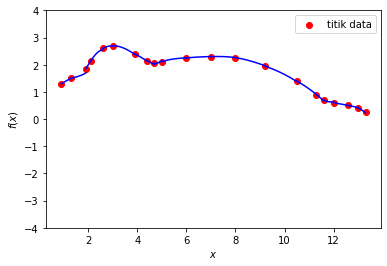

In [ ]:
interval = [np.linspace(data[i,0], data[i+1, 0], 100) for i in range(n-1)]
plt.scatter(data[:,0], data[:,1], c='red', label='titik data')
for i in range(n-1):
  plt.plot(interval[i], S[i](interval[i]), 'b')

plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim([-4, 4]);
plt.legend();